# Task 8: Clustering with K-Means
 ## Objective: Perform unsupervised learning with K-Means clustering.
 ## Tools: Scikit-learn, Pandas, Matplotlib

In [25]:
#import required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.cluster import Kmeans

# pandas : for data manipulation 
# numpy :for nummerical operations
# matplotlib & seaborn: for data visualization 
# Kmeans: from scikit- learn , for clustering

In [26]:
# load the data
df = pd.read_csv('C:\\Users\\prach\\Downloads\\Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [27]:
#  Exploratory Data Analysis (EDA)

df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
#  feature selection 
#   we will use Anual income and Spending score 
X= df[['Annual Income (k$)', 'Spending Score (1-100)']]

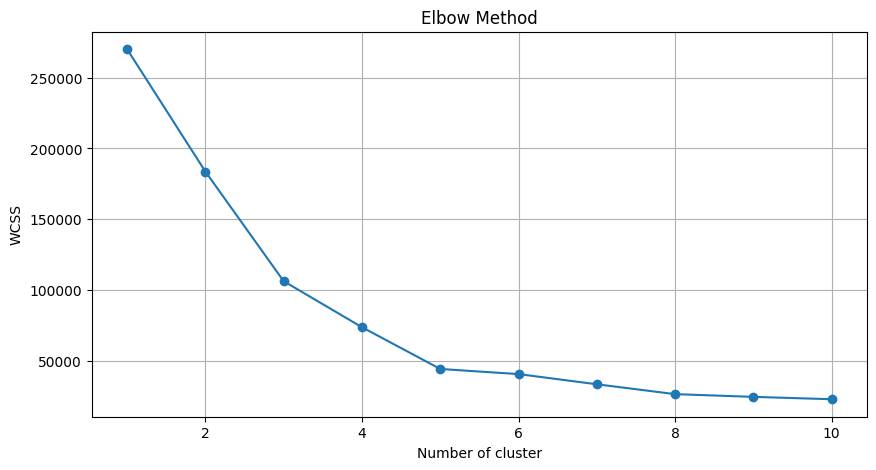

In [29]:
# Determine Optimal number of clusters (Elbow method)
# Elbow method: a technique to find the best number of clusters(K)

from sklearn.cluster import KMeans 
wcss = []    # initialize an empty List to store the Within-Cluster sum of square[wcss] 
for i in range(1,11):# try differnt number of clusters 1 to 10
    kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # save the WCSS (inertia ) for each value of k

plt.figure(figsize=(10,5))   # set width, hight in inches 
plt.plot(range(1,11), wcss,marker='o')
#plot the WCSS values(y_axis) against the number of clusters from 1 to 10(X_axis)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

    

In [30]:
# applying kmeans clustring 

kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# fit predict does two things 
# fits the KMeans model to your data X., Predict the cluster label (0 to 4) data point
# result y_kmeans is an array that tell you which cluster each customer belong


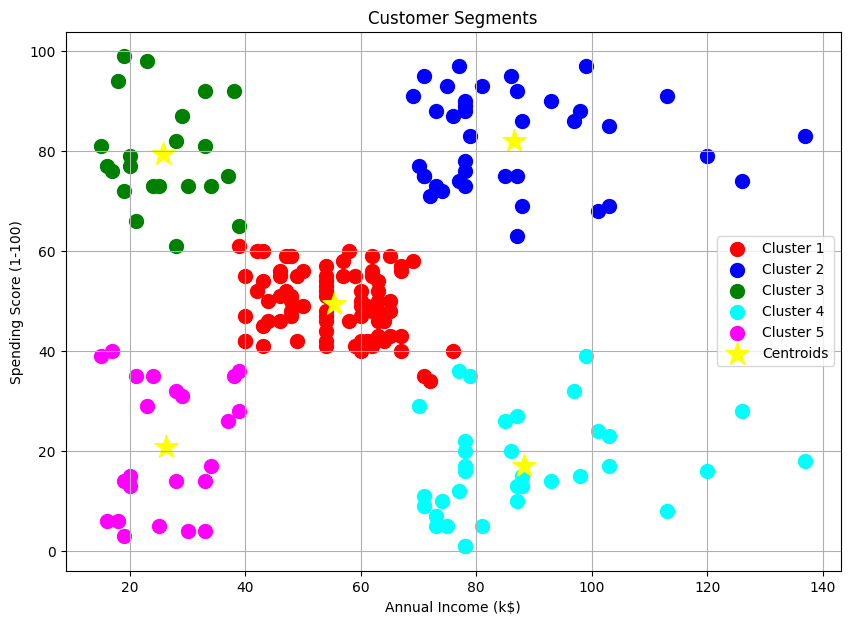

In [31]:
# visulize the clusters
 
plt.figure(figsize=(10,7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], 
                s=100, c=colors[i], label=labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# add cluster label to data

df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [33]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# analyze cluster

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## ✅ Conclusion – Task 8: Customer Segmentation (K-Means Clustering)


Selected relevant features: Annual Income and Spending Score.

Used the Elbow Method to determine the optimal number of clusters (k = 5).

Applied K-Means Clustering to segment customers into 5 distinct groups.

Each cluster represents a different type of customer behavior.

This segmentation can help businesses target specific customer groups more effectively.